**Loading** libraries and datasets

In [1]:
# importing libraries
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import numpy             as np                       # managing nums
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.linear_model import LinearRegression    # linear regression (scikit-learn)


# loading data - Youtube
df_youtube = pd.read_csv('./datasets/social media influencers - youtube.csv')

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# loading data - Tiktok
df_tiktok = pd.read_csv('./datasets/social media influencers - tiktok.csv')

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)



In [2]:
# preparing youtube dataset

# renaming the columns
df_youtube.columns = ['user_name', 'channel_name', 'category', 'subscribers',
                     'audience_country', 'avg_views', 'avg_likes', 'avg_comments']

# creating a column as the last column to reach the same shapre
df_youtube['avg_reactions'] = np.nan

df_youtube.head(n=5)

,user_name,channel_name,category,subscribers,audience_country,avg_views,avg_likes,avg_comments,avg_reactions
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,NaN
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21,NaN
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K,NaN
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K,NaN


In [3]:
# preparing youtube dataset

# renaming the columns

df_tiktok.columns = ['user_name', 'channel_name', 'subscribers',
                     'avg_views', 'avg_likes', 'avg_comments','avg_reactions']

# creating the empty columns to reach the same shape
df_tiktok.insert(2, 'category', np.nan)
df_tiktok.insert(4, 'audience_country', np.nan)

df_tiktok.head(n=5)

,user_name,channel_name,category,subscribers,audience_country,avg_views,avg_likes,avg_comments,avg_reactions
0,ekin.721,MOMO’s,NaN,221.7K,NaN,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,NaN,22.2M,NaN,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,NaN,2.1M,NaN,20.7M,3.5M,38.8K,33.9K
3,charlidamelio,charli d’amelio,NaN,135.4M,NaN,18.7M,2.6M,54.7K,35.2K
4,luvadepedreiro,Iran Ferreira (Lai),NaN,11.4M,NaN,24.8M,2.6M,32.7K,26.8K


In [4]:
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_name         1000 non-null   object 
 1   channel_name      1000 non-null   object 
 2   category          723 non-null    object 
 3   subscribers       1000 non-null   object 
 4   audience_country  839 non-null    object 
 5   avg_views         1000 non-null   object 
 6   avg_likes         962 non-null    object 
 7   avg_comments      791 non-null    object 
 8   avg_reactions     0 non-null      float64
dtypes: float64(1), object(8)
memory usage: 70.4+ KB


**Preparing** the datasets for join

In [5]:
###############################################
# Preparing the Youtube dataset 
###############################################

# subscribers
#replacing K and M with zeros to get the number format
df_youtube['subscribers'] = df_youtube['subscribers'].str.replace("K",'00')
df_youtube['subscribers'] = df_youtube['subscribers'].str.replace("M",'00000')
df_youtube['subscribers'] = df_youtube['subscribers'].str.replace(".",'')

# changing the variable type
df_youtube['subscribers'] = df_youtube['subscribers'].astype(float)


# avg_views
#replacing K and M with zeros to get the number format
df_youtube['avg_views'] = df_youtube['avg_views'].str.replace("K",'00')
df_youtube['avg_views'] = df_youtube['avg_views'].str.replace("M",'00000')
df_youtube['avg_views'] = df_youtube['avg_views'].str.replace(".",'')

# changing the variable type
df_youtube['avg_views'] = df_youtube['avg_views'].astype(float)


# avg_likes
#replacing K and M with zeros to get the number format
df_youtube['avg_likes'] = df_youtube['avg_likes'].str.replace("K",'00')
df_youtube['avg_likes'] = df_youtube['avg_likes'].str.replace("M",'00000')
df_youtube['avg_likes'] = df_youtube['avg_likes'].str.replace(".",'')

# changing the variable type
df_youtube['avg_likes'] = df_youtube['avg_likes'].astype(float)


# avg_likes
#replacing K and M with zeros to get the number format
df_youtube['avg_comments'] = df_youtube['avg_comments'].str.replace("K",'00')
df_youtube['avg_comments'] = df_youtube['avg_comments'].str.replace("M",'00000')
df_youtube['avg_comments'] = df_youtube['avg_comments'].str.replace(".",'')

# changing the variable type
df_youtube['avg_comments'] = df_youtube['avg_comments'].astype(float)

# changing the variable type for avg_reactions
df_youtube['avg_reactions'] = df_youtube['avg_reactions'].astype(float)

# including a new variable to identify the social media
df_youtube['social_media'] = 'youtube'

df_youtube

C:\Users\USER\AppData\Local\Temp/ipykernel_6620/2700234261.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_youtube['subscribers'] = df_youtube['subscribers'].str.replace(".",'')
C:\Users\USER\AppData\Local\Temp/ipykernel_6620/2700234261.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_youtube['avg_views'] = df_youtube['avg_views'].str.replace(".",'')
C:\Users\USER\AppData\Local\Temp/ipykernel_6620/2700234261.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_youtube['avg_likes'] = df_youtube['avg_likes

,user_name,channel_name,category,subscribers,audience_country,avg_views,avg_likes,avg_comments,avg_reactions,social_media
0,tseries,T-Series,Music & Dance,212100000.0,India,323700.0,9800.0,290.0,NaN,youtube
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000.0,NaN,13800000.0,80900.0,NaN,NaN,youtube
2,setindia,SET India,NaN,130400000.0,India,23600.0,314.0,21.0,NaN,youtube
3,PewDiePie,PewDiePie,Animation,111400000.0,United States,1400000.0,80800.0,4600.0,NaN,youtube
4,MrBeast6000,MrBeast,Video games,92500000.0,United States,30600000.0,1700000.0,67700.0,NaN,youtube
...,...,...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9200000.0,Brazil,1400000.0,110100.0,2500.0,NaN,youtube
996,EL GATO,EL GATO,Toys,9200000.0,Brazil,243800.0,30700.0,636.0,NaN,youtube
997,CinemaSins,CinemaSins,Movies,9200000.0,United States,29600.0,10200.0,874.0,NaN,youtube
998,CricketICC,ICC,Sports,9200000.0,India,15200.0,854.0,58.0,NaN,youtube


In [6]:
###############################################
# Preparing the tiktok dataset 
###############################################

# subscribers
#replacing K and M with zeros to get the number format
df_tiktok['subscribers'] = df_tiktok['subscribers'].str.replace("K",'00')
df_tiktok['subscribers'] = df_tiktok['subscribers'].str.replace("M",'00000')
df_tiktok['subscribers'] = df_tiktok['subscribers'].str.replace(".",'')

# changing the variable type
df_tiktok['subscribers'] = df_tiktok['subscribers'].astype(float)


# avg_views
#replacing K and M with zeros to get the number format
df_tiktok['avg_views'] = df_tiktok['avg_views'].str.replace("K",'00')
df_tiktok['avg_views'] = df_tiktok['avg_views'].str.replace("M",'00000')
df_tiktok['avg_views'] = df_tiktok['avg_views'].str.replace(".",'')

# changing the variable type
df_tiktok['avg_views'] = df_tiktok['avg_views'].astype(float)


# avg_likes
#replacing K and M with zeros to get the number format
df_tiktok['avg_likes'] = df_tiktok['avg_likes'].str.replace("K",'00')
df_tiktok['avg_likes'] = df_tiktok['avg_likes'].str.replace("M",'00000')
df_tiktok['avg_likes'] = df_tiktok['avg_likes'].str.replace(".",'')

# changing the variable type
df_tiktok['avg_likes'] = df_tiktok['avg_likes'].astype(float)


# avg_likes
#replacing K and M with zeros to get the number format
df_tiktok['avg_comments'] = df_tiktok['avg_comments'].str.replace("K",'00')
df_tiktok['avg_comments'] = df_tiktok['avg_comments'].str.replace("M",'00000')
df_tiktok['avg_comments'] = df_tiktok['avg_comments'].str.replace(".",'')

# changing the variable type
df_tiktok['avg_comments'] = df_tiktok['avg_comments'].astype(float)

# avg_reactions
#replacing K and M with zeros to get the number format
df_tiktok['avg_reactions'] = df_tiktok['avg_reactions'].str.replace("K",'00')
df_tiktok['avg_reactions'] = df_tiktok['avg_reactions'].str.replace("M",'00000')
df_tiktok['avg_reactions'] = df_tiktok['avg_reactions'].str.replace(".",'')

# changing the variable type for avg_reactions
df_tiktok['avg_reactions'] = df_tiktok['avg_reactions'].astype(float)

# including a new variable to identify the social media
df_tiktok['social_media'] = 'tiktok'

df_tiktok

C:\Users\USER\AppData\Local\Temp/ipykernel_6620/4063514397.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tiktok['subscribers'] = df_tiktok['subscribers'].str.replace(".",'')
C:\Users\USER\AppData\Local\Temp/ipykernel_6620/4063514397.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tiktok['avg_views'] = df_tiktok['avg_views'].str.replace(".",'')
C:\Users\USER\AppData\Local\Temp/ipykernel_6620/4063514397.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tiktok['avg_likes'] = df_tiktok['avg_likes'].str

,user_name,channel_name,category,subscribers,audience_country,avg_views,avg_likes,avg_comments,avg_reactions,social_media
0,ekin.721,MOMO’s,NaN,221700.0,NaN,2600000.0,2800000.0,29400.0,116400.0,tiktok
1,dojacat,Doja Cat,NaN,22200000.0,NaN,25400000.0,500000.0,36700.0,46800.0,tiktok
2,kiet.ac.quy,Kiệt Ắk Wỷ,NaN,2100000.0,NaN,20700000.0,3500000.0,38800.0,33900.0,tiktok
3,charlidamelio,charli d’amelio,NaN,135400000.0,NaN,18700000.0,2600000.0,54700.0,35200.0,tiktok
4,luvadepedreiro,Iran Ferreira (Lai),NaN,11400000.0,NaN,24800000.0,2600000.0,32700.0,26800.0,tiktok
...,...,...,...,...,...,...,...,...,...,...
995,nicolebernaal,nicolebernaal,NaN,400000.0,NaN,2200000.0,351300.0,957.0,195.0,tiktok
996,bellaretamosa,bella,NaN,5100000.0,NaN,2500000.0,340400.0,901.0,145.0,tiktok
997,tunico80,🌠Antonio Tonon🌠,NaN,5800000.0,NaN,100000.0,206800.0,200.0,2100.0,tiktok
998,armon.warren,Armoney,NaN,1200000.0,NaN,1900000.0,300800.0,904.0,630.0,tiktok


In [7]:
# joining both dataset into one DataFrame

# creating the list of object and joining as a dataframe
social_media = [df_youtube, df_tiktok]
df_social_media = pd.DataFrame(pd.concat(social_media))

In [8]:
# checking the dataframe
df_social_media

,user_name,channel_name,category,subscribers,audience_country,avg_views,avg_likes,avg_comments,avg_reactions,social_media
0,tseries,T-Series,Music & Dance,212100000.0,India,323700.0,9800.0,290.0,NaN,youtube
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000.0,NaN,13800000.0,80900.0,NaN,NaN,youtube
2,setindia,SET India,NaN,130400000.0,India,23600.0,314.0,21.0,NaN,youtube
3,PewDiePie,PewDiePie,Animation,111400000.0,United States,1400000.0,80800.0,4600.0,NaN,youtube
4,MrBeast6000,MrBeast,Video games,92500000.0,United States,30600000.0,1700000.0,67700.0,NaN,youtube
...,...,...,...,...,...,...,...,...,...,...
995,nicolebernaal,nicolebernaal,NaN,400000.0,NaN,2200000.0,351300.0,957.0,195.0,tiktok
996,bellaretamosa,bella,NaN,5100000.0,NaN,2500000.0,340400.0,901.0,145.0,tiktok
997,tunico80,🌠Antonio Tonon🌠,NaN,5800000.0,NaN,100000.0,206800.0,200.0,2100.0,tiktok
998,armon.warren,Armoney,NaN,1200000.0,NaN,1900000.0,300800.0,904.0,630.0,tiktok


**Analyzing** missing data

In [9]:
# checking missing data
df_social_media.isnull().sum()

user_name              0
channel_name           2
category            1277
subscribers            0
audience_country    1161
avg_views              0
avg_likes             38
avg_comments         209
avg_reactions       1000
social_media           0
dtype: int64

In [10]:
# imputing/replacing missing data for categorical variables

# channel name
df_social_media['channel_name'] = df_social_media['channel_name'].replace(np.nan,'Undefined')

# category
df_social_media['category'] = df_social_media['category'].replace(np.nan,'Undefined')

# audience country
df_social_media['audience_country'] = df_social_media['audience_country'].replace(np.nan,'Undefined')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


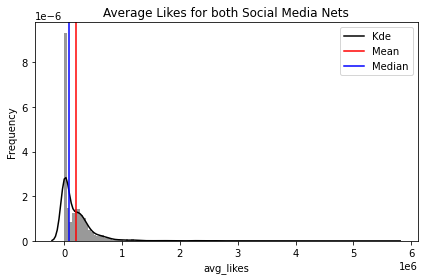

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


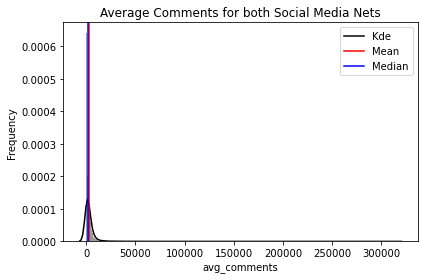

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


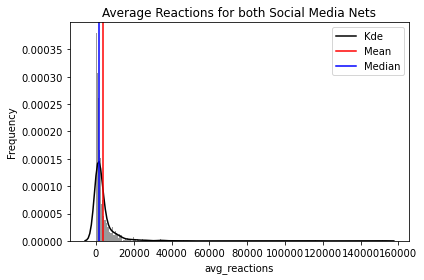

In [11]:
# checking numeric variables with missing values

# Ploting an Histogram using seaborn for avg_likes

# setting figure size
fig, ax = plt.subplots(figsize = [6,4])

# histogram for chart
sns.distplot( a       = df_social_media['avg_likes'],
             bins     = 'fd',                           # bins as normal distribution. Could be a number.
             hist     = True,                           # define plot as histogram
             kde      = True,                           # line that shows the behavior (as normal distribution)
             rug      = False,
             color    = 'black')

# Tittles
plt.title(label    = 'Average Likes for both Social Media Nets')
plt.xlabel(xlabel  = 'avg_likes')
plt.ylabel(ylabel  = 'Frequency')

# New: These add vertical lines to the code
plt.axvline(x = df_social_media['avg_likes'].mean(),                #Add a vertical line across the axes. I this case the mean
            color = 'red')

plt.axvline( x    = df_social_media['avg_likes'].median(),          #Add a vertical line across the axes. I this case the median
            color = 'blue')

# Add legend
plt.legend(labels =  ['Kde','Mean','Median'])         # Place a legend with the axes.

# compile and display the plot
plt.tight_layout()
plt.show()


# Ploting an Histogram using seaborn for avg_comments

# setting figure size
fig, ax = plt.subplots(figsize = [6,4])

# histogram for chart
sns.distplot( a       = df_social_media['avg_comments'],
             bins     = 'fd',                           # bins as normal distribution. Could be a number.
             hist     = True,                           # define plot as histogram
             kde      = True,                           # line that shows the behavior (as normal distribution)
             rug      = False,
             color    = 'black')

# Tittles
plt.title(label    = 'Average Comments for both Social Media Nets')
plt.xlabel(xlabel  = 'avg_comments')
plt.ylabel(ylabel  = 'Frequency')

# New: These add vertical lines to the code
plt.axvline(x = df_social_media['avg_comments'].mean(),                #Add a vertical line across the axes. I this case the mean
            color = 'red')

plt.axvline( x    = df_social_media['avg_comments'].median(),          #Add a vertical line across the axes. I this case the median
            color = 'blue')

# Add legend
plt.legend(labels =  ['Kde','Mean','Median'])         # Place a legend with the axes.

# compile and display the plot
plt.tight_layout()
plt.show()


# Ploting an Histogram using seaborn for avg_reactions

# setting figure size
fig, ax = plt.subplots(figsize = [6,4])

# histogram for chart
sns.distplot( a       = df_social_media['avg_reactions'],
             bins     = 'fd',                           # bins as normal distribution. Could be a number.
             hist     = True,                           # define plot as histogram
             kde      = True,                           # line that shows the behavior (as normal distribution)
             rug      = False,
             color    = 'black')

# Tittles
plt.title(label    = 'Average Reactions for both Social Media Nets')
plt.xlabel(xlabel  = 'avg_reactions')
plt.ylabel(ylabel  = 'Frequency')

# New: These add vertical lines to the code
plt.axvline(x = df_social_media['avg_reactions'].mean(),                #Add a vertical line across the axes. I this case the mean
            color = 'red')

plt.axvline( x    = df_social_media['avg_reactions'].median(),          #Add a vertical line across the axes. I this case the median
            color = 'blue')

# Add legend
plt.legend(labels =  ['Kde','Mean','Median'])         # Place a legend with the axes.

# compile and display the plot
plt.tight_layout()
plt.show()

In [12]:
# imputing/replacing missing data for numerical variables

# filling missing values - avg_like
df_social_media['avg_likes'].fillna(value = df_social_media['avg_likes'].median(),
                         inplace = True)

# filling missing values - avg_comments
df_social_media['avg_comments'].fillna(value = df_social_media['avg_comments'].mean(),
                         inplace = True)

# filling missing values - avg_reactions
df_social_media['avg_reactions'].fillna(value = df_social_media['avg_reactions'].mean(),
                         inplace = True)

# droping all rows with missing value
#df_auto = df_auto.dropna()
df_social_media.isnull().describe()

,user_name,channel_name,category,subscribers,audience_country,avg_views,avg_likes,avg_comments,avg_reactions,social_media
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False
freq,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


**Featuring engineering** Preparing some categorical variables to be included in the prediction model <br><br>

Most frequente categories <br>
Most frequent countries <br>
Type of social media <br>

In [13]:
# checking category for dummy variable creation
df_social_media['category'].value_counts()

Undefined               1277
Music & Dance            224
Animation                 97
Video games               84
News & Politics           49
Toys                      45
Movies                    38
Daily vlogs               35
Education                 33
Humor                     30
Science & Technology      17
Food & Drinks             16
DIY & Life Hacks          15
Sports                    11
Fashion                    7
Animals & Pets             4
Design/art                 4
Fitness                    3
ASMR                       3
Health & Self Help         2
Autos & Vehicles           2
Beauty                     2
Mystery                    1
Travel                     1
Name: category, dtype: int64

In [14]:
# creating dummy variables for category Music & Dance, Animation and Video Games
# df['category_name'] = df.Category.map({'unique_term':0, 'unique_term2':1})

# Music & Dance
df_social_media['music_n_dance'] = df_social_media.category.map({'Music & Dance':1})
df_social_media['music_n_dance'] = df_social_media['music_n_dance'].replace(np.nan,0)

# Animation
df_social_media['animation'] = df_social_media.category.map({'Animation':1})
df_social_media['animation'] = df_social_media['animation'].replace(np.nan,0)

# Video Games
df_social_media['video_games'] = df_social_media.category.map({'Video games':1})
df_social_media['video_games'] = df_social_media['video_games'].replace(np.nan,0)

In [15]:
# checking audience_country for dummy variable creation
df_social_media['audience_country'].value_counts()

Undefined         1161
United States      291
India              208
Brazil              92
Mexico              64
Indonesia           38
Russia              33
Thailand            18
Philippines         16
Colombia            10
Iraq                10
Egypt                8
Argentina            7
Pakistan             6
United Kingdom       5
Saudi Arabia         5
Spain                5
Bangladesh           3
Japan                3
France               3
Algeria              3
Turkey               3
Peru                 2
Morocco              2
Ecuador              1
Poland               1
Singapore            1
Cyprus               1
Name: audience_country, dtype: int64

In [16]:
# creating dummy variables for countries United States, India, Brazil, Mexico
# df['category_name'] = df.Category.map({'unique_term':0, 'unique_term2':1})

# United Stated
df_social_media['aud_united_states'] = df_social_media.category.map({'United States':1})
df_social_media['aud_united_states'] = df_social_media['aud_united_states'].replace(np.nan,0)

# India
df_social_media['aud_india'] = df_social_media.category.map({'India':1})
df_social_media['aud_india'] = df_social_media['aud_india'].replace(np.nan,0)

# Brazil
df_social_media['aud_brazil'] = df_social_media.category.map({'Brazil':1})
df_social_media['aud_brazil'] = df_social_media['aud_brazil'].replace(np.nan,0)

# Mexico
df_social_media['video_mexico'] = df_social_media.category.map({'Mexico':1})
df_social_media['video_mexico'] = df_social_media['video_mexico'].replace(np.nan,0)

In [17]:
# checking audience_country for dummy variable creation
df_social_media['social_media'].value_counts()

youtube    1000
tiktok     1000
Name: social_media, dtype: int64

In [18]:
# creating dummy variables for tiktok and youtube
# df['category_name'] = df.Category.map({'unique_term':0, 'unique_term2':1})

# youtube
df_social_media['youtube'] = df_social_media.social_media.map({'youtube':1})
df_social_media['youtube'] = df_social_media['youtube'].replace(np.nan,0)

# tiktok
df_social_media['tiktok'] = df_social_media.category.map({'tiktok':1})
df_social_media['tiktok'] = df_social_media['tiktok'].replace(np.nan,0)


**Linear regression** analysis for predicting numerical variables

**OLS** Ordinary Least Squares Regression

In [19]:
# preparing explanatory variable data
df_social_media_data   = df_social_media.drop(['user_name', 'channel_name', 
                                            'category', 'audience_country',
                                           'social_media', 'avg_likes'],
                                           axis = 1)


# preparing response variables
df_social_media_target = df_social_media.loc[ : , 'avg_likes']

# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
                                        df_social_media_data,
                                        df_social_media_target,
                                        test_size = 0.25,
                                        random_state = 501)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1500, 13)
y-side: (1500,)


Testing Data
------------
X-side: (500, 13)
y-side: (500,)



In [20]:
# printing set of x-variables
x_variables = ['user_name', 'channel_name', 'category', 'subscribers', 
               'audience_country', 'avg_views', 'avg_likes', 'avg_comments', 
               'avg_reactions', 'social_media', 'music_n_dance', 'animation', 
               'video_games', 'aud_united_states', 'aud_india', 'aud_brazil', 
               'video_mexico', 'youtube', 'tiktok']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

user_name +
channel_name +
category +
subscribers +
audience_country +
avg_views +
avg_likes +
avg_comments +
avg_reactions +
social_media +
music_n_dance +
animation +
video_games +
aud_united_states +
aud_india +
aud_brazil +
video_mexico +
youtube +
tiktok +


In [21]:
##############################
# Predicting average likes
##############################

# merging X_train and y_train so that they can be used in statsmodels
df_social_media_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """avg_likes ~ subscribers +
                                            avg_views +
                                            avg_comments +
                                            avg_reactions +
                                            music_n_dance +
                                            animation +
                                            video_games +
                                            aud_united_states +
                                            aud_india +
                                            aud_brazil +
                                            video_mexico +
                                            youtube +
                                            tiktok
                                            """,
                                data = df_social_media_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              avg_likes   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     279.1
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          6.91e-290
Time:                        17:37:27   Log-Likelihood:                -20494.
No. Observations:                1500   AIC:                         4.101e+04
Df Residuals:                    1491   BIC:                         4.105e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.764e+05   9886.67

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


The variables with **p-value** with **nan or higher than 0.05** are droped from the model because those variables are **not statistically significant** for predict average likes

In [22]:
##############################
# Predicting average likes using relevant variables
##############################

# merging X_train and y_train so that they can be used in statsmodels
df_social_media_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """avg_likes ~ subscribers +
                                            avg_views +
                                            avg_comments +
                                            avg_reactions +
                                            youtube
                                            """,
                                data = df_social_media_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              avg_likes   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     447.0
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          1.35e-293
Time:                        17:37:27   Log-Likelihood:                -20495.
No. Observations:                1500   AIC:                         4.100e+04
Df Residuals:                    1494   BIC:                         4.103e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.765e+05   9873.003     17.875

In [23]:
# declaring set of x-variables
x_variables = ['subscribers', 'avg_views','avg_comments',
               'avg_reactions', 'youtube']

In [24]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = df_social_media[x_variables]

# preparing response variable
df_social_media_target = df_social_media['avg_likes']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            df_social_media_data,     # x-variables
            df_social_media_target,   # y-variable
            test_size = 0.25,
            random_state = 501)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            df_social_media_target,   # y-variable
            test_size = 0.25,
            random_state = 501)


In [25]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data  # check _OLS to all regression code lines AND CHECK WITH AND WITHOUT OLS (OR _FULL)
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.5993
OLS Testing Score  : 0.5009
OLS Train-Test Gap : 0.0984


In [26]:
# prediction model

# zipping each feature name to its coefficient
lr_model_values = zip(ols_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 176479.65)
('subscribers', 0.0023)
('avg_views', 0.0385)
('avg_comments', 7.0569)
('avg_reactions', 9.0791)
('youtube', -258634.0785)


**Classification model** 

**Logistic regression** to classify success or failure

In [27]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

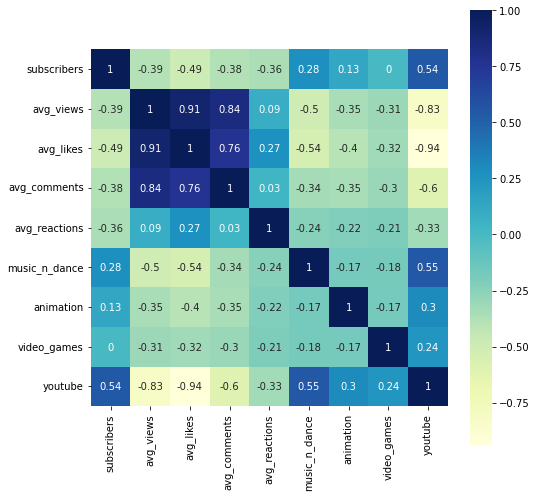

In [28]:
# data for analyze correlation
df_social_media_data_2   = df_social_media.drop(['user_name', 'channel_name', 
                                                 'category', 'audience_country',
                                                 'social_media', 'aud_united_states', 
                                                 'aud_india', 'aud_brazil', 
                                                 'video_mexico', 'tiktok'],
                                                  axis = 1)

df_social_media_corr = df_social_media_data_2.corr().round(2)

df_social_media_corr['avg_likes'].sort_values(ascending = False)


# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = df_social_media_corr.corr(method = 'pearson').round(decimals = 2)


# creating a correlation heatmap
sns.heatmap(data   = df_corr,
            cmap   = 'YlGnBu',
            square = True,
            annot  = True)


# rendering the heatmap
plt.show()

In [29]:
# defining the threshold to success
avg_likes_threshold = df_social_media_data_2['avg_likes'].mean()

# # defining the condition
avg_likes_cond = df_social_media_data_2.loc[: , 'avg_likes'] > avg_likes_threshold
avg_likes_cond = pd.DataFrame(avg_likes_cond)

avg_likes_cond.columns = ['high_likes']

# concatenating the dataframe and the targer variable

df_logit = pd.concat([avg_likes_cond.loc[ : , ['high_likes'
                     ]],
                     df_social_media_data_2],
                     axis = 1
                    )

# # creating the target variable based on high_likes
df_logit['target'] = df_logit.high_likes.map({True:1})
df_logit['target'] = df_logit['target'].replace(np.nan,0)

In [30]:
# ceclaring explanatory variables
df_logit_data = df_logit.drop(['target','high_likes'], axis =1)

# declaring response variable
df_logit_target = df_logit.loc[: , 'target']

In [31]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            df_logit_data,
            df_logit_target,
            test_size    = 0.25,
            random_state = 501,
            stratify     = df_logit_target)


# merging training data for statsmodels
df_logit_train = pd.concat([x_train, y_train], axis = 1)

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
0.0    0.63
1.0    0.37
Name: target, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
0.0    0.63
1.0    0.37
Name: target, dtype: float64



In [32]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """target ~ subscribers +
                                        avg_views + avg_comments +
                                        avg_reactions + music_n_dance + 
                                        animation + video_games +
                                        youtube
                                        """,
                           data    = df_logit_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.341968
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1491
Method:                           MLE   Df Model:                            8
Date:                Sat, 09 Apr 2022   Pseudo R-squ.:                  0.4819
Time:                        17:37:27   Log-Likelihood:                -512.95
converged:                       True   LL-Null:                       -990.02
Covariance Type:            nonrobust   LLR p-value:                1.185e-200
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0449      0.138      0.326      0.745      -0.225       0.315
subscribers    6.935e-09   7.95e-09      0.872      0.383   -8.65e-09    2.25e-08
avg_views      2.062e-07   4.12e-08      5.010      0.000    1.26e-07    2.87e-07
avg_comments      0.0002   2.64e-05      6.581      0.000       0.000       0.000
avg_reactions -6.238e-05   1.54e-05     -4.062      0.000   -9.25e-05   -3.23e-05
music_n_dance    -0.5899      0.639     -0.924      0.356      -1.842       0.662
animation        -0.2468      0.731     -0.338      0.736      -1.679       1.185
video_games       0.6130      0.598      1.025      0.306      -0.560       1.786
youtube          -4.1955      0.324    -12.962      0.000      -4.830      -3.561
=================================================================================
"""

In [33]:
#####################
# Sample Solution 1 - Using significant variables
#####################

# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ target ~ avg_views + avg_comments +
                                        avg_reactions + youtube""",
                                    data = df_logit_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary()

Optimization terminated successfully.
         Current function value: 0.343072
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1495
Method:                           MLE   Df Model:                            4
Date:                Sat, 09 Apr 2022   Pseudo R-squ.:                  0.4802
Time:                        17:37:27   Log-Likelihood:                -514.61
converged:                       True   LL-Null:                       -990.02
Covariance Type:            nonrobust   LLR p-value:                1.623e-204
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0683      0.135      0.506      0.613      -0.196       0.333
avg_views      2.144e-07   4.07e-08      5.270      0.000    1.35e-07    2.94e-07
avg_comments      0.0002   2.59e-05      6.765      0.000       0.000       0.000
avg_reactions -6.427e-05   1.55e-05     -4.151      0.000   -9.46e-05   -3.39e-05
youtube          -4.1546      0.247    -16.815      0.000      -4.639      -3.670
=================================================================================
"""

In [34]:
# runing logistic regression in Scikit learn

# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['subscribers', 'avg_views', 'avg_comments',
                   'avg_reactions', 'music_n_dance', 
                   'animationm', 'animation', 'video_games',
                   'youtube'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['avg_views', 'avg_comments',
                   'avg_reactions', 'youtube'],

}

In [35]:
# train/test split with the full model
logit_data   =  df_logit.loc[ : , candidate_dict['logit_sig']]
logit_target =  df_logit.loc[ : , 'target']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            logit_data,
            logit_target,
            random_state = 501,
            test_size    = 0.25,
            stratify     = logit_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 501)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7993
LogReg Testing  ACCURACY: 0.776
LogReg Train-Test Gap   : 0.0233


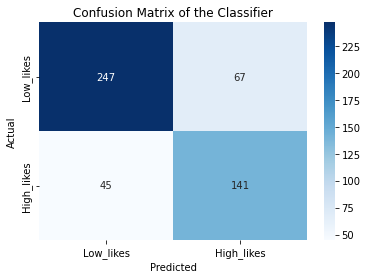

In [36]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Low_likes', 'High_likes'])

In [37]:
# zipping each feature name to its coefficient
logreg_model_values = zip(df_logit[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 10))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 10))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -8.18e-08)
('avg_views', 3.316e-07)
('avg_comments', 5.54861e-05)
('avg_reactions', -0.0002692021)
('youtube', -1.188e-07)


**Conclusion** <br>

Descriptive statistics and **KPIs**, based on measures of central tendency such as average or demographic variables,
help in the process of understanding the micro-communities of social networks.

There are different sets of machine learning methods that require clean and appropriate data to provide accurate and **relevant predictions**. Categorical variables are included in this prediction using "dummy" variables, using a numerical representation of the desired categories.

The first type is **linear regression**, in which a numerical variable is predicted based on the behavior of some explanatory variables.

The second type is **classification models**. For this video, we only used one technique: logistic regression, but there are other methods to predict success or failure, such as the type of user who gets more likes than the average... but this is just one example of what it could be done.

A third type, not included in this video, to keep it simple, is **unsupervised learning** using the same datsets.